In [1]:
#Imports
import matplotlib.pyplot as plotter_lib

import numpy as np

import PIL as image_lib

import tensorflow as tflow

from tensorflow.keras.layers import Flatten

from keras.layers.core import Dense

from tensorflow.keras.models import Sequential

from tensorflow.keras.optimizers import Adam

import matplotlib.pyplot as plt

from keras.layers import Dropout

import random


In [2]:
#Dataset to learn

import pathlib

demo_dataset = pathlib.Path(r"C:\Users\micha\OneDrive\Desktop\Classification - Copy")

directory = str(demo_dataset)

data_directory = pathlib.Path(directory)

In [3]:
#pre-proccesing and splitting the dataset

img_height,img_width=180,180

batch_size=32

train_ds = tflow.keras.preprocessing.image_dataset_from_directory(

  data_directory,

  validation_split=0.2,

  subset="training",

  seed=2,

label_mode='categorical',

  image_size=(img_height, img_width),

  batch_size=batch_size)

Found 162 files belonging to 34 classes.
Using 130 files for training.


In [4]:
#pre-proccesing and splitting the dataset

validation_ds = tflow.keras.preprocessing.image_dataset_from_directory(

  data_directory,

  validation_split=0.2,

  subset="validation",

  seed=123,

label_mode='categorical',

  image_size=(img_height, img_width),

  batch_size=batch_size)

Found 162 files belonging to 34 classes.
Using 32 files for validation.


In [5]:
#Choosing the model- Sequential, Adding pre-trained model-ResNet50
#Choosing parameters of the model (dropout)

demo_resnet_model = Sequential()

pretrained_model_for_demo = tflow.keras.applications.ResNet50(include_top=False,
                                                              input_shape=(180,180,3),
                                                              pooling='avg',
                                                              classes=34, 
                                                              weights='imagenet')

for each_layer in pretrained_model_for_demo.layers:
    each_layer.trainable = False

demo_resnet_model.add(pretrained_model_for_demo)
demo_resnet_model.add(Flatten())
demo_resnet_model.add(Dense(512, activation='relu'))
demo_resnet_model.add(Dropout(0.5))  # Dropout layer with rate of 0.5
demo_resnet_model.add(Dense(34, activation='softmax'))


In [6]:
# Higher the amount the more the model learns around 200 achieved some good results.
epochs=200

In [7]:
#Train the model 
#choose optimizer
#choose metrics
demo_resnet_model.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

history = demo_resnet_model.fit(train_ds, validation_data=validation_ds, epochs=epochs)

Epoch 1/50
5/5 [==============================] - 8s 986ms/step - loss: 4.2318 - accuracy: 0.0538 - val_loss: 2.9333 - val_accuracy: 0.2188
Epoch 2/50
5/5 [==============================] - 4s 706ms/step - loss: 3.3491 - accuracy: 0.1462 - val_loss: 2.6401 - val_accuracy: 0.2812
Epoch 3/50
5/5 [==============================] - 4s 707ms/step - loss: 3.1583 - accuracy: 0.1000 - val_loss: 2.7261 - val_accuracy: 0.1562
Epoch 4/50
5/5 [==============================] - 3s 688ms/step - loss: 3.2872 - accuracy: 0.0923 - val_loss: 2.5867 - val_accuracy: 0.2500
Epoch 5/50
5/5 [==============================] - 4s 711ms/step - loss: 2.8401 - accuracy: 0.1538 - val_loss: 2.3621 - val_accuracy: 0.2188
Epoch 6/50
5/5 [==============================] - 4s 713ms/step - loss: 2.8181 - accuracy: 0.1538 - val_loss: 2.1766 - val_accuracy: 0.3438
Epoch 7/50
5/5 [==============================] - 3s 691ms/step - loss: 2.6258 - accuracy: 0.2692 - val_loss: 2.1083 - val_accuracy: 0.2812
Epoch 8/50
5/5 [====

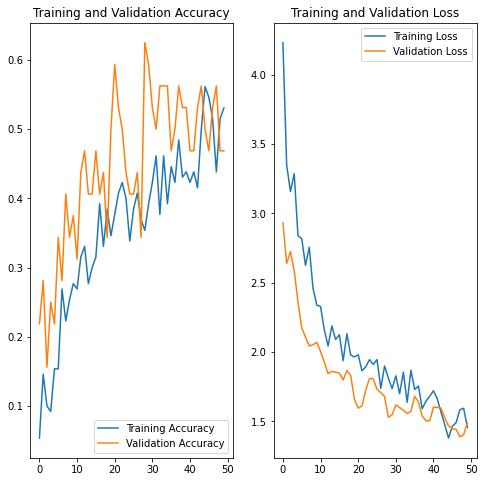

In [8]:
#Visualizing the training and validation accuracy
#checking the loss to determine the amount of Epochs needed

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [9]:
#printing all class names
class_names = train_ds.class_names

print("Classification Labels:")
for i, label in enumerate(class_names):
    print(f"{i}: {label}")


Classification Labels:
0: Changing lanes - A
1: Changing lanes - B
2: Circulating in a roundabout - A
3: Circulating in a roundabout - B
4: Collided in the back with another vehicle traveling in the same direction and in the same lane - A
5: Collided in the back with another vehicle traveling in the same direction and in the same lane - B
6: Coming to the right (at an intersection) - A
7: Coming to the right (at an intersection) - B
8: Did not respect the preference signal or red traffic light - A
9: Did not respect the preference signal or red traffic light - B
10: Entering a parking, private place, onto a dirt road - A
11: Entering a parking, private place, onto a dirt road - B
12: Entering a roundabout - A
13: Entering a roundabout - B
14: Exiting a parking lot, private place, onto a dirt road - A
15: Exiting a parking lot, private place, onto a dirt road - B
16: Exiting a parking lot-opening door - A
17: Exiting a parking lot-opening door - B
18: Invading the lane reserved for traf

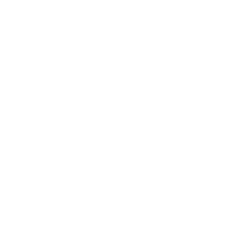

1/1 [==============================] - 0s 62ms/step
True labels: ['Reversing - B']
Predicted labels: ['Changing lanes - A', 'Did not respect the preference signal or red traffic light - B', 'Entering a roundabout - B']


In [17]:
# Load a random image from the validation dataset
for image_batch, label_batch in validation_ds:
    random_index = random.randint(0, len(image_batch)-1)
    image = image_batch[random_index]
    true_labels = label_batch[random_index]
    break

# Display the chosen image
plt.imshow(image.numpy().astype("uint8"))
plt.axis("off")
plt.show()

# Preprocess the image
img_array = np.array(image)
img_array = np.expand_dims(img_array, axis=0)
img_array = img_array / 255.0

# Use the model to predict the classication of the imageÇ
predictions = demo_resnet_model.predict(img_array)
predicted_labels = np.where(predictions > 0.1)[1]

# Print the true labels
true_label_names = [class_names[i] for i in np.where(true_labels == 1)[0]]
print("True labels:", true_label_names)

# Print the predicted labels
predicted_label_names = [class_names[i] for i in predicted_labels]
print("Predicted labels:", predicted_label_names)


In [11]:
#In case you have a test dataset

test_path = r"C:\Users\micha\OneDrive\Desktop\Test"

# Load a random image from the test dataset
images = os.listdir(test_path)
random_index = random.randint(0, len(images)-1)
image_path = os.path.join(test_path, images[random_index])
image = cv2.imread(image_path)

# Display the chosen image
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

# Preprocess the image
img_array = cv2.resize(image, (224, 224))
img_array = np.expand_dims(img_array, axis=0)
img_array = img_array / 255.0

# Use the model to predict the class of the image
predictions = demo_resnet_model.predict(img_array)
predicted_labels = np.where(predictions > 0.2)[1]

# Print the predicted labels
predicted_label_names = [class_names[i] for i in predicted_labels]
print("Predicted labels:", predicted_label_names)



NameError: name 'os' is not defined